 ## Data Wrangling with Python: Activity 7

In [1]:
#disregard- installing beautifulsoup
pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=44fcc2cc114ff8fd3aa8d4c2a0add0bbd5032cd54b03022956023de7e0f013c4
  Stored in directory: c:\users\chris\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [43]:
# opening wikapedia site and loading the GDP data into the fd variable- taking a shortcut here to see if it works. Calling live wepage didn't work for me here. Saving HTML. Using RB versus just R as having decoding errors.
# Changed encoding to hopefully resolve error.

fd = open("view-source_https___en.wikipedia.org_wiki_List_of_countries_by_GDP_(nominal).htm", "rb")
soup = BeautifulSoup(fd)
fd.close()



In [38]:
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))


Total number of tables are 7 


In [140]:
# Didn't get a class type here. May need to open source HTML instead of page HTML.
# Edited class keywork to get string to work. 

data_table = soup.find("table", {"class": "wikitable"})
print(type(data_table))

# trying to preview data_table
df = pd.DataFrame(data_table)
df.head()

<class 'bs4.element.Tag'>


,0
0,\n
1,[GDP (USD million) by country\n]
2,\n
3,"[[\n, [Country/Territory\n], \n, [<a href=""/wi..."


In [113]:
# Tried to troubleshoot sources_list variable. td is not found in the html in sources variable.

sources = data_table.tbody.findAll('tr', recursive=False)[0]

# using th for the end of a source instead of td. 
sources_list = [td for td in sources.findAll('th')]
print(len(sources_list))
#looking into sources_list to check data
sources

5


<tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th rowspan="2"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN Region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_2-2"><a href="#cite_note-GDP_IMF-2">[1]</a></sup><sup class="reference" id="cite_ref-15"><a href="#cite_note-15">[13]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[14]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_17-0"><a href="#cite_note-UN-17">[15]</a></sup>
</th></tr>

In [128]:
# not sure what's going on here- data_table has 'td' in the frame. bs4 not recognizing the td tags
# not getting an output

data = data_table.tbody.findAll('tr', recursize=False)[1].findAll("td", recursive=False)
data

[]

In [127]:
# bs4 not finding 'table'
data_tables= []
for td in data:
    data_tables.append(td.finadAll('table'))
data_tables

[]

In [75]:
len(data_tables)

0

In [125]:
# got lost here. tried to change the position for get text, but it's only referencing the 4th source in the variable.
source_names = [sources.findAll('a')[4].getText() for source in sources_list]
print(source_names)

['World Bank', 'World Bank', 'World Bank', 'World Bank', 'World Bank']


In [126]:
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

IndexError: list index out of range

## Data Wrangling with Python: Activity 8

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
# read the visit file

visitData = pd.read_csv("visit_data.csv")

In [143]:
# Let's look inside visitData variable
visitData

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [145]:
# using duplicated function bolean

print("First name is duplicated - {}".format(any(visitData.first_name.duplicated())))
print("Last name is duplicated - {}".format(any(visitData.last_name.duplicated())))
print("Email is duplicated - {}".format(any(visitData.email.duplicated())))

First name is duplicated - True
Last name is duplicated - True
Email is duplicated - False


In [148]:
# Now let's check for missing information or blanks

print("The column Email contains NaN - %r " % visitData.email.isnull().values.any())
print("The column IP address contains NaN - %r " % visitData.ip_address.isnull().values.any())
print("The column VIsit contains NaN - %r " % visitData.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP address contains NaN - False 
The column VIsit contains NaN - True 


In [160]:
# removing null values for the 'Visit' column- treating as outliers. 

#capturing current count of rows
size_prev = visitData.shape

#changing variables to keep original data

visitData= visitData[np.isfinite(visitData['visit'])]
size_after = df.shape
size_prev
size_after

print("The size of previous data set was - {prev[0]} rows and the new size is - {after[0]} rows." .format(prev=size_prev, after=size_after))

The size of previous data set was - 974 rows and the new size is - 974 rows.


{'whiskers': [<matplotlib.lines.Line2D at 0x1f8a25ae1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8a25ae790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8a259beb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8a25aed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8a25be040>],
 'means': []}

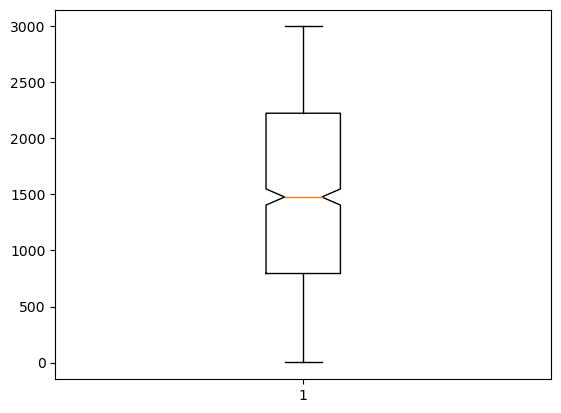

In [163]:
# ploting the data
plt.boxplot(visitData.visit, notch=True)

In [168]:
# shaving off some values

df1 = visitData[(visitData["visit"] <= 2900) & (visitData['visit'] >=100)]
print("After getting rid of outliers the new size of the data is - {}" .format(*df1.shape))

After getting rid of outliers the new size of the data is - 923


## Practice SQL Lite

In [174]:
# going to try code from our previous course for building SQL database
# save a notepad with the .db extension for call

In [204]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('mydatabase.db')

conn.execute('''CREATE TABLE IF NOT EXISTS contacts 
                (ID INT PRIMARY KEY NOT NULL,
                NAME TEXT NOT NULL,
                ADDRESS TEXT NOT NULL,
                CITY TEXT NOT NULL,
                STATE TEXT NOT NULL,
                ZIP_CODE INT NOT NULL,
                PHONE_NUMBER INT NOT NULL);''')

data = [(1,'John Doe','123 Main St','New York','NY',10001,1234567890),
        (2,'Jane Brown','456 Market St','San Francisco','CA',94104,2345678901),
        (3,'Bob Smyth','789 Park Ave','Los Angeles','LA',90001,3456789012),
        (4,'Alice Johnson','246 Elm St','Chicago','IL',60601,4567890123),
        (5,'Tom Brown','369 Oak St','Houston','TX',77001,5678901234),
        (6,'Sara Davis','159 Maple St','Phoenix','AZ',85001,6789012345),
        (7,'Michael Wilson','753 Pine St','Philadelphia','PA',19019,7890123456),
        (8,'Emily Clark','964 Cedar St','San Antonio','TX',78201,8901234567),
        (9,'William Lee','753 Fir St','San Diego','CA',92101,9012345678),
        (10,'Ashley Gonzalez','369 Birch St','Dallas','TX',75201,123456789)]

df = pd.DataFrame(data, columns=['ID','NAME','ADDRESS','CITY','STATE','ZIP_CODE','PHONE_NUMBER'])

df.to_sql("contacts", conn, if_exists="replace")

10

In [207]:
df6 = pd.read_sql_query("select * from contacts", con=conn)
df6

,index,ID,NAME,ADDRESS,CITY,STATE,ZIP_CODE,PHONE_NUMBER
0,0,1,John Doe,123 Main St,New York,NY,10001,1234567890
1,1,2,Jane Brown,456 Market St,San Francisco,CA,94104,2345678901
2,2,3,Bob Smyth,789 Park Ave,Los Angeles,LA,90001,3456789012
3,3,4,Alice Johnson,246 Elm St,Chicago,IL,60601,4567890123
4,4,5,Tom Brown,369 Oak St,Houston,TX,77001,5678901234
5,5,6,Sara Davis,159 Maple St,Phoenix,AZ,85001,6789012345
6,6,7,Michael Wilson,753 Pine St,Philadelphia,PA,19019,7890123456
7,7,8,Emily Clark,964 Cedar St,San Antonio,TX,78201,8901234567
8,8,9,William Lee,753 Fir St,San Diego,CA,92101,9012345678
9,9,10,Ashley Gonzalez,369 Birch St,Dallas,TX,75201,123456789
